# Parcial computacional sobre Test de Hipótesis
### Agustín Rombolá - LU: 338/14 - DNI: 38.176.468

Se importan las librerías de Python y se declara la función que calcula el error para los bines de un histograma. Ambas cuestiones serán necesarias a lo largo de todo el trabajo.

In [1]:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
import math
from IPython.display import display, clear_output
colorNaranja = '#ff7f0e'
colorCeleste = '#1f77b4'
colorVerde = '#0BAF12'
colorVioleta = '#5A1AD1'
colorRosa = '#EF24B7'
colorVerdeClaro='#bcbd22'

#Función de errores de los histogramas que será utilizada en todos los items
def error_histograma(ancho_bin,x,y):
    norm = 1/(ancho_bin*len(x))
    error = np.sqrt(y*norm)
    return error

## Item 2: Estadística en la calle
Durante el trabajo se utilizarán dos serie de datos. Una corresponde a patentes observadas en el barrio de Nuñez y otra en Caballito. Por lo tanto, se generan dos listas con las patentes disponibles en un archivo de texto para cada barrio.

In [2]:
file1 = 'PatentesCaballito.txt'
patentesCaballito = np.genfromtxt(file1,dtype=str,delimiter=',')
patentesCaballito = list(patentesCaballito)
patentesCaballito.pop(0) #Elimina el primer elemento porque solamente contiene la palabra patentes
print('El archivo',file1,'contiene:',len(patentesCaballito),'patentes')

file2 = 'PatentesNunez.txt'
patentesNunez = np.genfromtxt(file2,dtype=str,delimiter=',')
patentesNunez = list(patentesNunez)
patentesNunez.pop(0) #Elimina el primer elemento porque solamente contiene la palabra patentes
print('El archivo',file2,'contiene:',len(patentesNunez),'patentes')

El archivo PatentesCaballito.txt contiene: 112 patentes
El archivo PatentesNunez.txt contiene: 91 patentes


La función **chequea_patentes** establece todas las letras en mayúscula, chequea que las patentes tengan exactamente 7 caracteres y elimina las patentes que estén repetidas. Además ordena las patentes de forma ascedente desde la más vieja a la más nueva.

In [3]:
def chequea_patentes(patentes):
    #Pone en mayúsculas todas las letras
    for i in range(len(patentes)):
        patentes[i] = patentes[i].upper()
    #Chequea que tenga 7 caracteres y si no los elimina
    eliminar = []
    for i in range(len(patentes)):
        if len(patentes[i]) != 7:
            eliminar.append(i)
    eliminar = eliminar[:-1]
    for k in eliminar:
        patentes.pop(k)
    #Busca patentes repetidas
    patentes_nuevo = []
    for pat in patentes:
        repetida = False
        for i in range(len(patentes_nuevo)):
            if patentes_nuevo[i] == pat:
                repetida = True
        if repetida == False:
            patentes_nuevo.append(pat)
    #Ordena las patentes
    patentes_nuevo.sort()
    return patentes_nuevo
#Chequea que la lista de patentes este bien para realizar el test.
patentesCaballito = chequea_patentes(patentesCaballito)
patentesNunez = chequea_patentes(patentesNunez)
print('Quedán',len(patentesCaballito),'patentes de Caballito sin repetir')
print('Quedán',len(patentesNunez),'patentes de Nuñez sin repetir')

Quedán 107 patentes de Caballito sin repetir
Quedán 87 patentes de Nuñez sin repetir


La función **convert_patentes** toma el vector con las patentes y transforma cada patente en un número natural. De forma que **AA000AA** será la 1, **AA000AB** la 2 y así sucesivamente. Con este objetivo, se generan las patentes desde **AA000AA** y se las cuenta hasta encontrar la primera de la lista de observadas, una vez que la encuentra agrega el número en un vector y así sucesivamente hasta encontrar todas. Se las ordena de menor a mayor para optimizar el proceso. 

Utilizando la función, se transforman las patentes de Caballito y las de Nuñez. Además se guarda en una variable la última patente registrada que corresponde a **AD592MF**. Será útil para la realización de los distintos items conocer el número de la última patente registrada. Todas las patentes que aún quedan por registrar (desde la última registrada hasta la **ZZ999ZZ** son irrelevantes porque desde luego no hay posibilidades de que sean observadas).

In [4]:
def convert_patentes(patentes):
    print('Cantidad de patentes:',len(patentes))
    patentes.sort()
    letras = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    numeros = '0123456789'
    patentes_numeros = []
    convert = 0
    p = 'AA000AA'
    count = 0
    salir = False
    for p1 in letras:
        if salir == True:
            break
        p = p1 + p[1:]
        for p2 in letras:
            if salir == True:
                break
            p = p[0] + p2 + p[2:]
            for p3 in numeros:
                if salir == True:
                    break
                p = p[:2] + p3 + p[3:]
                for p4 in numeros:
                    if salir == True:
                        break
                    p = p[:3] + p4 + p[4:]
                    for p5 in numeros:
                        if salir == True:
                            break
                        p = p[:4] + p5 + p[5:]
                        for p6 in letras:
                            if salir == True:
                                break
                            p = p[:5] + p6 + p[6:]
                            for p7 in letras:
                                p = p[:6] + p7
                                if convert==len(patentes):
                                    salir = True
                                    break
                                if p == patentes[convert]:
                                    convert = convert + 1
                                    # Se suma uno al contador para que empieze contando de 1 y no de 0
                                    count = count + 1
                                    print(convert,': Patente',p,'transformada en',count)
                                    clear_output(wait=True)
                                    patentes_numeros.append(count)
                                     
                                else:
                                    count = count + 1
    print(len(patentes_numeros),'patentes transformadas')
    return patentes_numeros
#Transforma la última patente
pat_ultima = convert_patentes(['AD592MF'])[0]
#Transforma el vector de patentes en números naturales
patNumeradasCaballito = np.array(convert_patentes(patentesCaballito))
patNumeradasNunez = np.array(convert_patentes(patentesNunez))
clear_output(wait=True)
print('Se transformaron',len(patNumeradasCaballito),'de Caballito')
print('Se transformaron',len(patNumeradasNunez),'de Nuñez')

Se transformaron 107 de Caballito
Se transformaron 87 de Nuñez


## Item 3: ¿Uniformemente distribuidos? - Test de Kolmogorov-Smirnov
Para realizar el **Test de Kolmogorov** se utilizará como **hipótesis cero** que la variable aleatoria *"patente observada"* proviene de una distrubición uniforme con dominio entre la primer patente *AA000AA* y la del último auto patentado que es *AD592MF*. Por el contrario como **hipótesis uno** se propone que las patentes siguen una distribución exponencial con un *lambda = 4.10^-7* y con un factor de normalización correspondiente a un dominio acotado entre la primer y la última patente existente. En el siguiente gráfico, que acompaña el código, se observan las curvas teóricas de las distribuciones. 

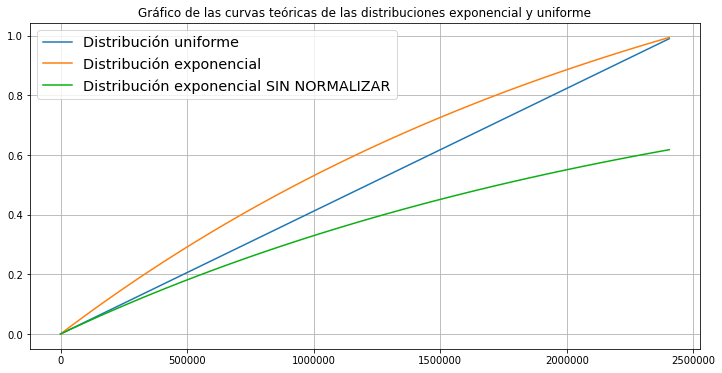

In [5]:
#Función lineal
def lineal(x,m,b):
    return x*m + b

#Plot de la función distibución uniforme y de la distribución exponencial
plt.figure(1,figsize=(12, 6))
x_plot = np.arange(1,pat_ultima+1,pat_ultima/100)

#Uniforme
pendiente = 1/(pat_ultima-1)
ordenada = -pendiente
y_plot_unif = lineal(x_plot,pendiente,ordenada)

#Exponencial
l = 4 * (10**-7)
factor_norm = (1-math.exp(-l*pat_ultima))
y_plot_exp = (1-np.exp(-l*x_plot))/factor_norm
y_plot_exp2 = (1-np.exp(-l*x_plot))
#Plot
plt.plot(x_plot,y_plot_unif,label='Distribución uniforme',color=colorCeleste)
plt.plot(x_plot,y_plot_exp,label='Distribución exponencial',color=colorNaranja)
plt.plot(x_plot,y_plot_exp2,label='Distribución exponencial SIN NORMALIZAR',color=colorVerde)
plt.grid()
plt.legend(fontsize='x-large')
plt.title('Gráfico de las curvas teóricas de las distribuciones exponencial y uniforme')
plt.show()

En la siguiente celda se desarrolla el **Test de Kolmogorov** teniendo como hipótesis cero que los datos provienen de una distribución uniforme como ya se detallo anteriormente. Para la realización del test, se construye una **función de distribución S para las patentes observadas**. Para construir S,primero se ordenan de menor a mayor, luego se le asigna a cada patente observada una **probabilidad de i/n** donde **n = cantidad de patentes observadas, i = orden de la patente**. La primera será de 1/n, la segunda de 2/n y así sucesivamente hasta que la última será n/n = 1. De esta forma la función distribución S queda monotonamente creciente y con la imagen acotada entre 0 y 1.

Finalmente el test consiste en construir el estadístico **Tk** como el máximo de la diferencia entre la distribución S y la distribución que se toma como hipotésis cero en este caso la uniforme. Para optimizar este proceso computacionalmente en la función **kolmogorov_unif** se compara la teórica con cada patente observada y además con la patente anterior existente que tendrá asignada la probabilidad de **la anterior observada**. Por ejemplo, para la cuarta patente observada la *función distribución S* toma un valor de **4/n**. Supongamos que la cuarta patente corresponde a la 5000, en ese caso también se utiliza para comparar la patente 4999 que por construción de S tomará un valor de **3/n**. Se debe utilizar la patente inmediatamente anterior porque es justo la última patente antes de que se produzca la discontinuidad y por ese motivo dependiendo el caso podría ser una de las que mayor distancia a la distribución teórica tenga. El proceso puede sonar complicado, pero computacionalmente es mucho más óptimo que comparar **TODAS** las patentes que pueden exister que rondan las dos millones y medio. No es necesario comparar todas debido a que las mayores distancias se dan en los puntos donde se produce la discontinuidad.

El proceso descripto queda claro en los gráficos que se presentan a continuación donde se gráfican las distribuciones teóricas y la distribución S para las patentes de Caballito y de Nuñez. En ambos casos se gráfica una recta vertical donde la distancia es máxima. Lo que corresponde al **Tk: estadístico del Test de Kolmogorov**.

El estadístico de Kolmogorov con H0: distribución uniforme es 0.17166959983442476 con 107 patentes de Caballito.
El estadístico de Kolmogorov con H0: distribución uniforme es 0.08923336684474245 con 87 patentes de Nuñez.


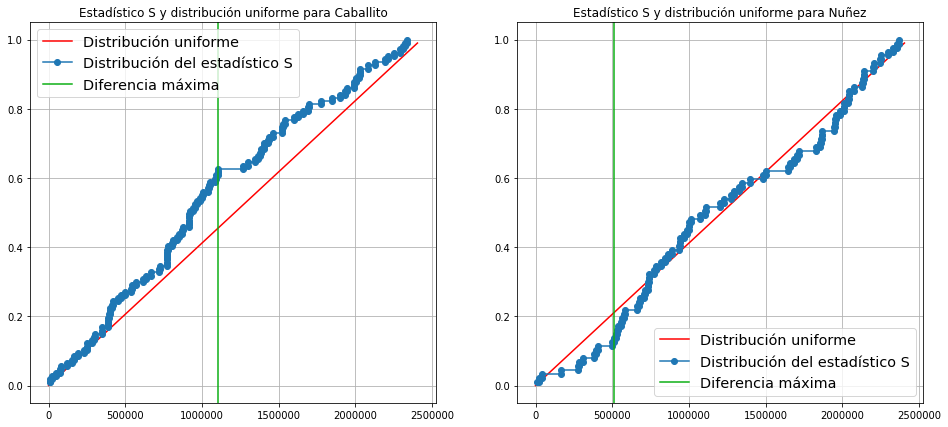

In [6]:
#Realiza el test de Kolmogorov con H0: distribución uniforme
def kolmogorov_unif(pat,ploteo,titulo,pat_ultima):
    pat.sort()
    #Construye el vector y del estadístico S
    y_pat = np.linspace(1,len(pat),len(pat),endpoint=True)/len(pat)
    #Construye el y para la distrubición uniforme teórica
    pendiente = 1/(pat_ultima-1)
    ordenada = -pendiente
    y_unif1 = lineal(pat,pendiente,ordenada)
    y_unif2 = lineal(pat-1,pendiente,ordenada)
    y_pat_anterior = list(y_pat)
    y_pat_anterior.pop(len(y_pat_anterior)-1)
    y_pat_anterior.insert(0,0)
    #Mide las distancias entre la teórica y la medida
    distancia1 = np.absolute(y_unif1-y_pat)
    distancia2 = np.absolute(y_unif2-y_pat_anterior)
    #Busca la distancia máxima que se usa en Kolmogorov
    maxima_distancia1 = np.max(distancia1)
    maxima_distancia2 = np.max(distancia2)
    if maxima_distancia1 > maxima_distancia2:
        index_max = list(distancia1).index(maxima_distancia1)
        x_max = pat[index_max]
        maxima_distancia = maxima_distancia1
    else: 
        index_max = list(distancia2).index(maxima_distancia2)
        x_max = pat[index_max+1]-1
        maxima_distancia = maxima_distancia2
    #Da la opción de realizar un ploteo
    if ploteo == True:
        #Genera un plot para ver como queda cada distribución
        x_plot = np.arange(1,pat_ultima+1,pat_ultima/100)
        plt.plot(x_plot,lineal(x_plot,pendiente,ordenada),color='red',label='Distribución uniforme')
        plt.step(pat,y_pat,where='post',marker='o',label='Distribución del estadístico S')
        plt.axvline(x=x_max,color=colorVerde,label='Diferencia máxima')
        plt.grid()
        plt.title(titulo)
        plt.legend(fontsize='x-large')
    return maxima_distancia

#Se generan los plots para los estadísticos S y las uniformes teóricas
plt.figure(1,figsize=(16, 7))

plt.subplot(1,2,1)
#Devuelve el T de la distribución de Kolmogorov para Caballito
Tk_cab = kolmogorov_unif(patNumeradasCaballito,True,'Estadístico S y distribución uniforme para Caballito',pat_ultima)
print('El estadístico de Kolmogorov con H0: distribución uniforme es',Tk_cab,'con',len(patNumeradasCaballito),'patentes de Caballito.')

plt.subplot(1,2,2)
#Devuelve el T de la distribución de Kolmogorov para Nuñez
Tk_nun = kolmogorov_unif(patNumeradasNunez,True,'Estadístico S y distribución uniforme para Nuñez',pat_ultima)
print('El estadístico de Kolmogorov con H0: distribución uniforme es',Tk_nun,'con',len(patNumeradasNunez),'patentes de Nuñez.')


En las celdas siguientes se tiene la función **kolmogorov_simulador** que se encarga de generar 10000 veces dos vectores de **n patentes** (cantidad de patentes observadas), uno con distribución uniforme y el otro con distribución exponencial (Con las características descriptas anterioremente). Para cada repetición se obtiene un **estadístico de Kolmogorov**, por lo que se tendran 10000 para cada distribución. En el caso de las patentes generadas con distribución uniforme se obtendrá un histograma que simula la distribución del estadístico suponiendo a la **hipótesis cero como válida**. Por el contrario, para las patentes generadas con distribución exponencial se obtendrá un histograma que simula la distribución del estadístico suponiendo a la **hipótesis uno como válida**.

Además tanto para las patentes de Caballito y de Nuñez se incluye en los gráficos el pvalue calculado y el **Tcrítico dada una significancia alpha = 0.05**.

In [7]:
#Genera simulaciones del test de Kolmogorov para la exponencial y la uniforme
def kolmogorov_simulador(n,pat,pat_ultima,name_datos):
    #Uniforme
    distancias_unif = []
    for i in range(n):
        x_unif = []
        for j in range(len(pat)):
            u = np.random.uniform(1,pat_ultima)
            x_unif.append(int(round(u,0)))
        x_unif.sort()
        x_unif = np.array(x_unif)
        distancias_unif.append(kolmogorov_unif(x_unif,False,'none',pat_ultima))
        print(name_datos,'- Simulando uniforme...',i,'de',n)
        clear_output(wait=True)
    #Exponencial    
    distancias_exp = []
    for i in range(n):
        x_exp = []
        for j in range(len(pat)):
            l = 4*(10**-7)
            factor_norm = (1-math.exp(-l*pat_ultima)) #Factor de Normalización
            e = pat_ultima+1 #Para que entre al while
            #El while elimina las patentes mas grande que la ultima
            while (e > pat_ultima):
                e = np.random.exponential(scale=1/l)/factor_norm
            x_exp.append(int(e))
        x_exp.sort()
        x_exp = np.array(x_exp)
        distancias_exp.append(kolmogorov_unif(x_exp,False,'none',pat_ultima))
        print(name_datos,'- Simulando exponencial...',i,'de',n)
        clear_output(wait=True)
    #Retorna vectores de distancias para la uniforme y para la exponencial
    return distancias_unif,distancias_exp

#Integra desde tk en adelante en una serie de datos y devuelve la prob
def integrador(datos,tk):
    c = 0
    for d in datos:
        if d >= tk:
            c = c + 1
    return c/len(datos)

#Calcula la potencia del test
def potencia_test(pvalue,alpha,dist_unif,dist_exp):
    pot = 0
    dist_unif.sort(reverse=True)
    dist_exp.sort(reverse=True)
    for i in range(len(dist_unif)):
        acumulado = i/len(dist_unif)
        if acumulado > alpha:
            t_critico = dist_unif[i-1]
            break
    for j in range(len(dist_exp)):
        if dist_exp[j] < t_critico:
            pot = (j-1)/len(dist_exp)
            break
        if j == (len(dist_exp)-1):
            pot = 1 
    return pot,t_critico

#Guardo las distancias simuladas con distribuciones uniformes y exponenciales
dist_unif_cab, dist_exp_cab = kolmogorov_simulador(10000,patNumeradasCaballito,pat_ultima,'Caballito')
dist_unif_nun, dist_exp_nun = kolmogorov_simulador(10000,patNumeradasNunez,pat_ultima,'Nuñez')

#Genero los p-value
pvalue_cab = integrador(dist_unif_cab,Tk_cab)
pvalue_nun = integrador(dist_unif_nun,Tk_nun)
print('El pvalue de H0 para Caballito es:',pvalue_cab,'osea un',round(pvalue_cab*100,3),'%')
print('El pvalue de H0 para Nuñez es:',pvalue_nun,'osea un',round(pvalue_nun*100,3),'%')

#Compara el p-value con el alpha dado de 0.05
def rechazo(alpha,pvalue):
    if pvalue <= alpha: 
        print('Se rechaza la hipótesis cero ya que el p-value es',pvalue,' menor que',alpha,'. Entonces se acepta la hipótesis uno.')
    else:
        print('Se acepta la hipótesis cero ya que el p-value es',pvalue,' mayor que',alpha,'. Entonces se rechaza la hipótesis uno.')

print('--> PARA LAS PATENTES DE CABALLITO:')
rechazo(0.05,pvalue_cab)
print('--> PARA LAS PATENTES DE NUÑEZ:')
rechazo(0.05,pvalue_nun)

#Calcula potencia
print('--> PARA LAS PATENTES DE CABALLITO:')
pot_test_cab,t_critico_cab = potencia_test(pvalue_cab,0.05,dist_unif_cab,dist_exp_cab)
print('El Tcrítico es: ',t_critico_cab,'y el medido es:',Tk_cab)
print('La potencia del test es',pot_test_cab,'o sea un',round(pot_test_cab*100,3),'%')

print('--> PARA LAS PATENTES DE NUÑEZ:')
pot_test_nun,t_critico_nun = potencia_test(pvalue_nun,0.05,dist_unif_nun,dist_exp_nun)
print('El Tcrítico es: ',t_critico_nun,'y el medido es:',Tk_nun)
print('La potencia del test es',pot_test_nun,'o sea un',round(pot_test_nun*100,3),'%')

El pvalue de H0 para Caballito es: 0.0038 osea un 0.38 %
El pvalue de H0 para Nuñez es: 0.4688 osea un 46.88 %
--> PARA LAS PATENTES DE CABALLITO:
Se rechaza la hipótesis cero ya que el p-value es 0.0038  menor que 0.05 . Entonces se acepta la hipótesis uno.
--> PARA LAS PATENTES DE NUÑEZ:
Se acepta la hipótesis cero ya que el p-value es 0.4688  mayor que 0.05 . Entonces se rechaza la hipótesis uno.
--> PARA LAS PATENTES DE CABALLITO:
El Tcrítico es:  0.13093529873756665 y el medido es: 0.17166959983442476
La potencia del test es 0.3626 o sea un 36.26 %
--> PARA LAS PATENTES DE NUÑEZ:
El Tcrítico es:  0.14418602894430999 y el medido es: 0.08923336684474245
La potencia del test es 0.3096 o sea un 30.96 %


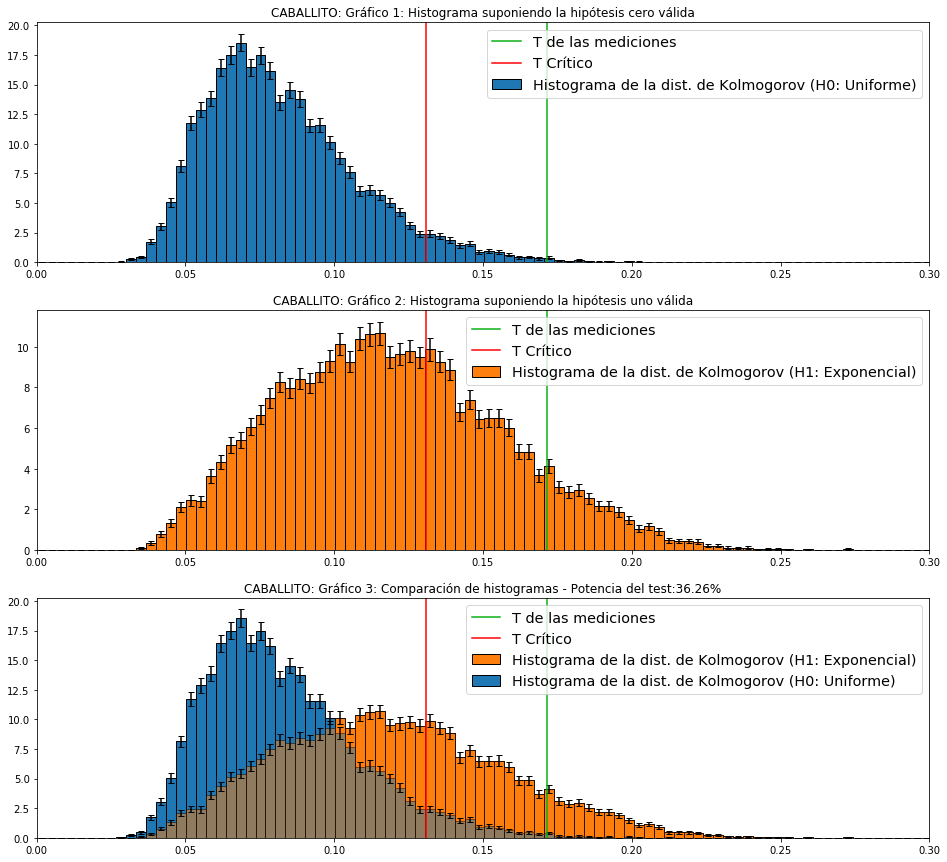

In [8]:
#Genero los bins para los histogramas
cant_bin = 300
n_bins = np.linspace(0,1,cant_bin,endpoint=True)
ancho_bin = n_bins[1] - n_bins[0]

plt.figure(1,figsize=(16, 15))
#Genera el bin para la uniforme de Caballito
prob_unif_cab,bins_unif_cab = np.histogram(dist_unif_cab,bins=n_bins,density=True)
#Genera el bin para la exponencial de Caballito
prob_exp_cab,bins_exp_cab = np.histogram(dist_exp_cab,bins=n_bins,density=True)
#Plotea bines de la H0
plt.subplot(3,1,1)
error1 = error_histograma(ancho_bin,dist_unif_cab,prob_unif_cab) #Error del bin
plt.bar(bins_unif_cab[:-1],prob_unif_cab,yerr=error1,capsize=3,width=ancho_bin,color=colorCeleste, ec='k',align='edge',label='Histograma de la dist. de Kolmogorov (H0: Uniforme)')
plt.axvline(x=Tk_cab,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_cab,color='red',label='T Crítico')
plt.legend(fontsize='x-large')
plt.title('CABALLITO: Gráfico 1: Histograma suponiendo la hipótesis cero válida')
plt.xlim([0,0.30])

#Plotea bines de la H1
plt.subplot(3,1,2)
error2 = error_histograma(ancho_bin,dist_exp_cab,prob_exp_cab) #Error del bin
plt.bar(bins_exp_cab[:-1],prob_exp_cab,yerr=error2,capsize=3,width=ancho_bin,color=colorNaranja, ec='k',align='edge',label='Histograma de la dist. de Kolmogorov (H1: Exponencial)')
plt.axvline(x=Tk_cab,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_cab,color='red',label='T Crítico')
plt.title('CABALLITO: Gráfico 2: Histograma suponiendo la hipótesis uno válida')
plt.legend(fontsize='x-large')
plt.xlim([0,0.30])

#Plotea bines de ambas distribuciones
plt.subplot(3,1,3)
plt.title('CABALLITO: Gráfico 3: Comparación de histogramas - Potencia del test:'+str(round(pot_test_cab*100,2))+'%')
plt.bar(bins_exp_cab[:-1],prob_exp_cab,yerr=error2,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorNaranja,label='Histograma de la dist. de Kolmogorov (H1: Exponencial)')
plt.bar(bins_unif_cab[:-1],prob_unif_cab,yerr=error1,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorCeleste,label='Histograma de la dist. de Kolmogorov (H0: Uniforme)')
plt.bar(bins_exp_cab[:-1],prob_exp_cab,width=ancho_bin, ec='k',alpha=0.5,align='edge',color=colorNaranja,label='_nolegend_')
plt.axvline(x=Tk_cab,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_cab,color='red',label='T Crítico')
plt.legend(fontsize='x-large')
plt.xlim([0,0.30])
plt.show()

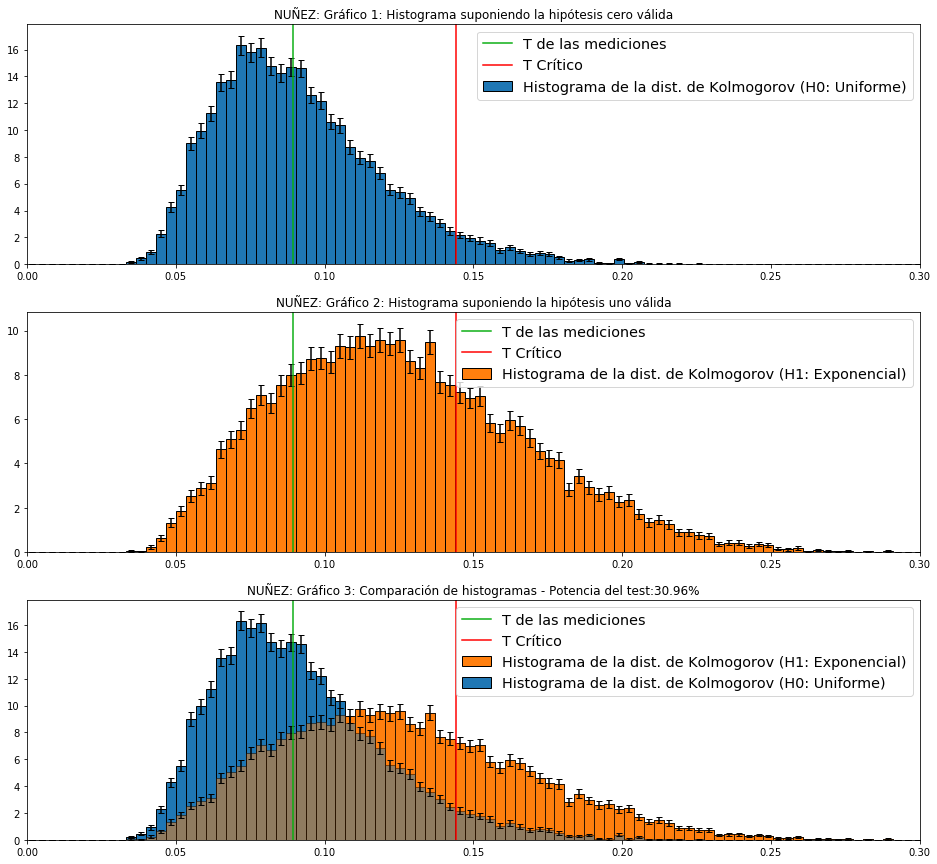

In [9]:
plt.figure(1,figsize=(16, 15))
#Genera el bin para la uniforme de Nuñez
prob_unif_nun,bins_unif_nun = np.histogram(dist_unif_nun,bins=n_bins,density=True)
#Genera el bin para la exponencial de Nuñez
prob_exp_nun,bins_exp_nun = np.histogram(dist_exp_nun,bins=n_bins,density=True)
#Plotea bines de la H0
plt.subplot(3,1,1)
error1 = error_histograma(ancho_bin,dist_unif_nun,prob_unif_nun) #Error del bin
plt.bar(bins_unif_nun[:-1],prob_unif_nun,yerr=error1,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorCeleste,label='Histograma de la dist. de Kolmogorov (H0: Uniforme)')
plt.axvline(x=Tk_nun,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_nun,color='red',label='T Crítico')
plt.legend(fontsize='x-large')
plt.title('NUÑEZ: Gráfico 1: Histograma suponiendo la hipótesis cero válida')
plt.xlim([0,0.30])

#Plotea bines de la H1
plt.subplot(3,1,2)
error2 = error_histograma(ancho_bin,dist_exp_nun,prob_exp_nun) #Error del bin
plt.bar(bins_exp_nun[:-1],prob_exp_nun,yerr=error2,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorNaranja,label='Histograma de la dist. de Kolmogorov (H1: Exponencial)')
plt.axvline(x=Tk_nun,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_nun,color='red',label='T Crítico')
plt.title('NUÑEZ: Gráfico 2: Histograma suponiendo la hipótesis uno válida')
plt.legend(fontsize='x-large')
plt.xlim([0,0.30])

#Plotea bines de ambas distribuciones
plt.subplot(3,1,3)
plt.title('NUÑEZ: Gráfico 3: Comparación de histogramas - Potencia del test:'+str(round(pot_test_nun*100,2))+'%')
plt.bar(bins_exp_nun[:-1],prob_exp_nun,yerr=error2,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorNaranja,label='Histograma de la dist. de Kolmogorov (H1: Exponencial)')
plt.bar(bins_unif_nun[:-1],prob_unif_nun,yerr=error1,capsize=3,width=ancho_bin, ec='k',align='edge',color=colorCeleste,label='Histograma de la dist. de Kolmogorov (H0: Uniforme)')
plt.bar(bins_exp_nun[:-1],prob_exp_nun,width=ancho_bin, ec='k',color=colorNaranja,alpha=0.5,align='edge',label='_nolegend_')
plt.axvline(x=Tk_nun,color=colorVerde,label='T de las mediciones')
plt.axvline(x=t_critico_nun,color='red',label='T Crítico')
plt.legend(fontsize='x-large')
plt.xlim([0,0.30])
plt.show()

En los gráficos desarollados en las celdas de arriba y en los calculos de la potencia del Test se puede observar que la potencia ronda entre el 30% y 40% para ambos casos. Sin embargo, **en el caso de Caballito al tener más patentes la potencia del test es mayor que en las patentes de Nuñez** . Esto se debe a que a mayor cantidad de datos **la distribución del estadístico de Kolmogorov dada H0 válida** disminuye su varianza y además su esperanza tiende a cero, por lo que es esperable que *"se separe"* más de la distribución del estadístico suponiendo la hipótesis uno válida. Este fenómeno traería como consecuencia un aumento en la potencia del Test. Incluso se podría, dada una **significancia alpha**, calcular cuantas patentes se tienen que observar si se quiere realizar un test con cierta potencia.  

## Item 4:  La patente del auto más nuevo
En este item se propone simular la distribución de la patente más nueva observada dadas k mediciones que provienen de una uniforme entre la primer y última patente.

Con este objetivo, se realizan N repeticiones que simulan observar la cantidad de patentes de cada medición (Caballito y Nuñez) suponiendo que la distribución entre la primera y la última es uniforme. De cada simulación se toma la patente más nueva observada y luego se construye un histograma con las N patentes máximas simuladas. **El histograma debería coincidir con la distribución teórica planteada en el ejercicio.** Para construir la curva teórica se utiliza la **aproximación de Stirling** ya que computacionalmente no es posible realizar el combinatorio de números muy grandes. 

--> CABALLITO
10000 simulaciones realizadas, suponiendo que se observaron 107 patentes.
El valor más alto obtenido en las generaciones es 2428504 y la patente más alta posible es 2428510
Lo más probable es que la patente más nueva observada este entre 2424245 y 2428504
De hecho la probablidad es de un 16.44 %
--> NUÑEZ
10000 simulaciones realizadas, suponiendo que se observaron 87 patentes.
El valor más alto obtenido en las generaciones es 2428507 y la patente más alta posible es 2428510
Lo más probable es que la patente más nueva observada este entre 2424416 y 2428507
De hecho la probablidad es de un 13.66 %


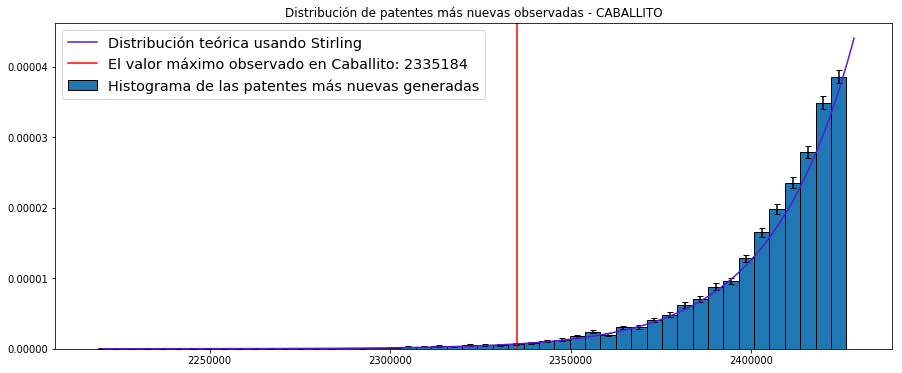

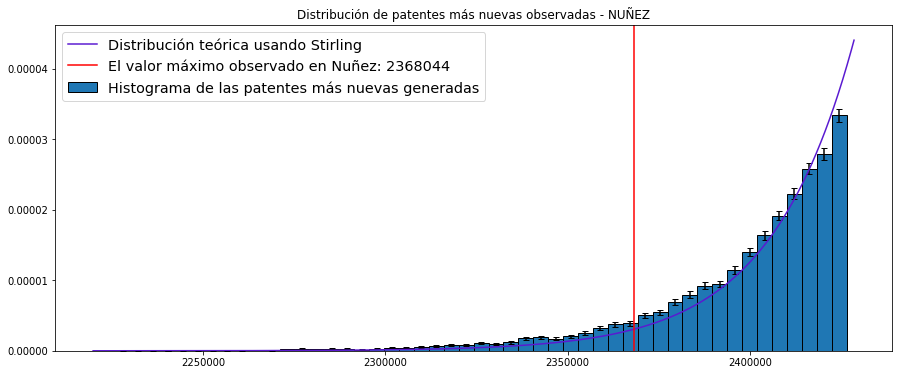

In [10]:
#Función que realiza el plot
def hace_plot(m,cant_bins,titulo):
    #Genera los bins para el histograma
    n_bins = np.linspace(np.min(m),np.max(m),cant_bins,endpoint=True)
    y_bins,x_bins = np.histogram(m,bins=n_bins,density=True)
    #Plot
    ancho_bin = np.absolute(n_bins[0]-n_bins[1])
    error = error_histograma(ancho_bin,m,y_bins) #Error del bin
    plt.bar(x_bins[:-1],y_bins,yerr=error,capsize=3,width=ancho_bin,ec='k',align='center',color=colorCeleste,label='Histograma de las patentes más nuevas generadas')
    plt.legend(fontsize='x-large')
    plt.title(titulo)
    #Valores mas probables
    b_min = n_bins[len(n_bins)-2]
    b_max = n_bins[len(n_bins)-1]
    print('Lo más probable es que la patente más nueva observada este entre',int(b_min),'y',int(b_max))
    prob_max = y_bins[len(n_bins)-2]*(b_max-b_min)
    print('De hecho la probablidad es de un',round(prob_max*100,3),'%')
    return n_bins

#Genera las simulaciones y devuelve el vector de máximas
def item4(N,n,k,plotear,titulo):
    m = []
    for i in range(N):
        patentes_observadas = []
        for j in range(k):
            #Genera patentes con distribución uniforme
            u = np.random.uniform(1,n)
            patentes_observadas.append(int(u))
        patentes_observadas = np.array(patentes_observadas)
        #Guarda la patente más nueva observada
        m.append(np.max(patentes_observadas))
    m = np.array(m)
    if plotear == True:
        print(N,'simulaciones realizadas, suponiendo que se observaron',k,'patentes.')
        print('El valor más alto obtenido en las generaciones es',np.max(m),'y la patente más alta posible es',pat_ultima)
        n_bins = hace_plot(m,50,titulo)
    return m

#La teórica usando Stirling
def stirling(n):
    s = n*np.log(n) - n + 0.5*np.log(2*math.pi*n) + 1/(12*n)
    return s

#Distribución teórica propuesta usando Stirling
def prob_item4(m,k,n):
    c1 = stirling(m-1) - stirling(k-1) - stirling(m-k)
    c2 = stirling(n) - stirling(k) - stirling(n-k)       
    p = np.exp(c1-c2)
    return p

#Realiza los plot
plt.figure(1,figsize=(15,6))
print('--> CABALLITO')
m_cab = item4(10000,pat_ultima,len(patNumeradasCaballito),True,'Distribución de patentes más nuevas observadas - CABALLITO')
x_teo_cab = np.arange(np.min(m_cab),np.max(m_cab)+1,1)
y_teo_cab = prob_item4(x_teo_cab,len(patNumeradasCaballito),pat_ultima)
plt.plot(x_teo_cab,y_teo_cab,color=colorVioleta,label='Distribución teórica usando Stirling')
etiqueta_cab = 'El valor máximo observado en Caballito: '+str(np.max(patNumeradasCaballito))
plt.axvline(x=np.max(patNumeradasCaballito),color='red',label=etiqueta_cab)
plt.legend(fontsize='x-large')

plt.figure(2,figsize=(15,6))
print('--> NUÑEZ')
m_nun = item4(10000,pat_ultima,len(patNumeradasNunez),True,'Distribución de patentes más nuevas observadas - NUÑEZ')
x_teo_nun = np.arange(np.min(m_nun),np.max(m_nun)+1,1)
y_teo_nun = prob_item4(x_teo_nun,len(patNumeradasNunez),pat_ultima)
plt.plot(x_teo_cab,y_teo_cab,color=colorVioleta,label='Distribución teórica usando Stirling')
etiqueta_nun = 'El valor máximo observado en Nuñez: '+str(np.max(patNumeradasNunez))
plt.axvline(x=np.max(patNumeradasNunez),color='red',label=etiqueta_nun)
plt.legend(fontsize='x-large')
plt.show()

En la siguiente celda se utiliza la inferencia bayesiana para obtener una distribución de **n = patente más nueva en circulación** dado una **m = patente máxima observada** de **k=patentes observadas**. Para esto se construye la función **bayes** que calcula, utilizando la función del item anterior, usando al **m de las mediciones** pero haciendo un barrido en **n desde la m medida hasta que acumule el 99% de probabilidad%**. (Para mostrar mejor el gráfico el programa también tiene la condición de barrer hasta llegar al valor real, sin embargo siendo riguroso se supone que no se conoce el valor real de la varible a la cual se le quiere estimar un intervalo).

En ls gráficos se muestran los intervalos que fueron construídos utilizando **upper limit**, ya que el mínimo lógicamente está dado por el valor máximo medido en cada caso. Se muestra el percentil de 68% correspondiante a un sigma y los percentil 95% correspondiente a dos sigmas.

--> NUÑEZ
Integrando el intervalo : [2368044, 2398954] el confidence level es 68.00032436739495 %
Integrando el intervalo : [2368044, 2446360] el confidence level es 95.00014353657713 %
--> CABALLITO
Integrando el intervalo : [2335184, 2359983] el confidence level es 68.00037741006415 %
Integrando el intervalo : [2335184, 2398419] el confidence level es 95.00004454452608 %
La última patente existente, la AD592MF corresponde a 2428510


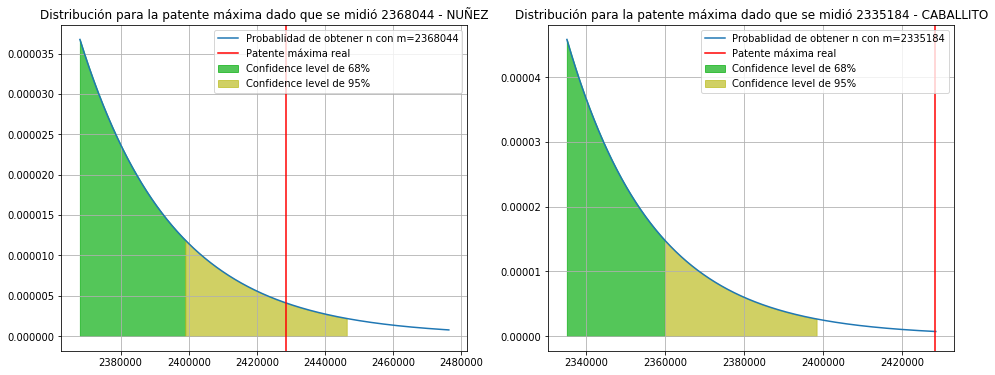

In [11]:
# Inferencia bayesiana
def bayes(pat,pat_ultima,titulo):
    k = len(pat) # Cantidad de patentes medidas
    valor_max = np.max(pat) #Toma la patente maxima medida como m
    n_posibles = []
    prob_n = []
    
    acumulado=0
    i = valor_max
    while(acumulado<0.99 or i<pat_ultima+100):
        n_posibles.append(i)
        p = prob_item4(valor_max,k,i)
        prob_n.append(p)
        acumulado = acumulado+p
        i = i + 1
    
    etiqueta = 'Probablidad de obtener n con m='+ str(valor_max)
    plt.plot(n_posibles,prob_n,label=etiqueta)
    plt.axvline(x=pat_ultima,color='red',label='Patente máxima real')
    plt.grid()
    plt.title(titulo)
    
    integral_1sigma = 0
    c1 = 0
    while(integral_1sigma <0.68):
        integral_1sigma= integral_1sigma + prob_n[c1]
        c1 = c1 +1
    interval1 = [valor_max,n_posibles[c1]]
    
    x_fill1 = np.arange(valor_max,n_posibles[c1]+1,1)
    abajo = np.zeros(len(x_fill1))
    plt.fill_between(x_fill1,y1=prob_n[0:c1+1],y2=abajo,alpha=0.7,color=colorVerde,label='Confidence level de 68%')
    
    print('Integrando el intervalo :',interval1,'el confidence level es',integral_1sigma*100,'%')
    integral_2sigma = 0
    c2 = 0
    while(integral_2sigma <0.95):
        integral_2sigma= integral_2sigma + prob_n[c2]
        c2 = c2 +1
    interval2 = [valor_max,n_posibles[c2]]
    
    x_fill2 = np.arange(n_posibles[c1],n_posibles[c2]+1,1)
    abajo = np.zeros(len(x_fill2))
    plt.fill_between(x_fill2,y1=prob_n[c1:c2+1],y2=abajo,alpha=0.7,color=colorVerdeClaro,label='Confidence level de 95%')
    
    print('Integrando el intervalo :',interval2,'el confidence level es',integral_2sigma*100,'%')
    plt.legend(loc='upper right')
    return interval1,interval2

#Hace los plots y calcula los integrales
plt.figure(1,figsize=(16,6))

print('--> NUÑEZ')
plt.subplot(1,2,1)
i1_nun,i2_nun = bayes(patNumeradasNunez,pat_ultima,'Distribución para la patente máxima dado que se midió '+str(np.max(patNumeradasNunez))+' - NUÑEZ')

print('--> CABALLITO')
plt.subplot(1,2,2)
i1_cab,i2_cab =bayes(patNumeradasCaballito,pat_ultima,'Distribución para la patente máxima dado que se midió '+str(np.max(patNumeradasCaballito))+' - CABALLITO')

print('La última patente existente, la AD592MF corresponde a',pat_ultima)

## Item 5: ¿Independientes del barrio?

En el item 5 se desarrolla el **Test de Wilcoxon**.  El mismo consta en tomar dos vectores de patentes, en este caso las de Nuñez y Caballito, y ordenar las patentes de ambos de menor a mayor. De esta forma se obtiene un ranking y de que barrio es cada patente. Por ejemplo se puede obtener algo como: 1. Nuñez 2. Nuñez 3.Caballito 4.Nuñez y así sucesivamente. De esta forma el **estadístico** se construye realizando una sumatoria del ranking para el vector que contenga **MENOS** patentes, en este caso el de Nuñez. Lógicamente el valor del estadístico está acotado al caso extremo mínimo en donde **TODAS** las primeras patentes son de Nuñez y al caso extremo máximo en donde **TODAS** las patentes últimas son de Nuñez. De esta forma se encuentra **W:estadístico de Wilcoxon** para mis muestras. Además utilizando la función **simulador_wilcoxon** se repiten N experimentos **suponiendo que efectivamente ambas muestras provienen de la misma distribución en este caso uniforme**. Luego se construye un histograma que muestra en forma númerica como es la distribución del estadístico.

El estadístico de Wilcoxon da 9235 y la esperanza es 8482.5 con sigma 388.9360487278082

El p-value es 0.0492 osea un 4.92 %
Tomando un alpha de 0.05
Se rechaza la hípotesis cero (ambas provienen de una uniforme) ya que el p-value = 0.0492 es menor que 0.05


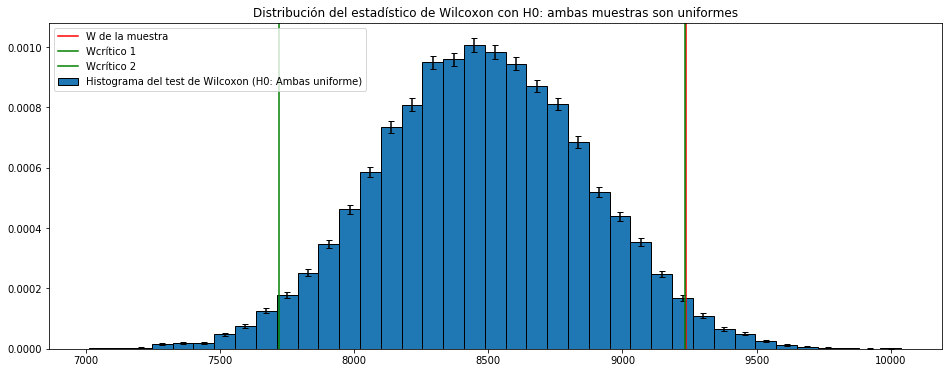

In [12]:
#Función que realiza el test de wilcoxon para dos muestras
def test_wilcoxon(pat1,pat2):
    #Chequea que muestra es mas grande
    if len(pat1) < len(pat2):
        pat_x = pat1
        pat_y = pat2
    else:
        pat_x = pat2
        pat_y = pat1
    n = len(pat_x)
    m = len(pat_y)
    # Define el vector de wilcoxon
    pat_patentes = np.append(pat_x,pat_y)
    pat_dato  = []
    for i in pat_x:
        pat_dato.append('x')
    for j in pat_y:
        pat_dato.append('y')

    #Ordena según las patentes y devuelve un vector de indices ordenados
    indices = np.argsort(pat_patentes)
    #Creo pat_wilcoxon que es una matrix con las patentes ordenadas y de que vector provienen

    pat_dato_new = []
    pat_patentes_new = []
    for i in indices:
        pat_patentes_new.append(pat_patentes[i])
        pat_dato_new.append(pat_dato[i])

    pat_wilcoxon = np.array([pat_dato_new,pat_patentes_new])

    w = 0
    for i in range(len(pat_patentes)):
        if 'x' == pat_wilcoxon[0,i]:
            w = w + i + 1
    esperanza_w = (n/2)*(n+m+1)
    varianza_w = ((n*m)/12)*(n+m+1)
    return w,esperanza_w,varianza_w

w, esp,var = test_wilcoxon(patNumeradasNunez,patNumeradasCaballito)
print('El estadístico de Wilcoxon da',w,'y la esperanza es',esp,'con sigma',np.sqrt(var))
print('')
def simulador_wilcoxon(n,m,pat_ultima,N):
    vector_w=[]
    for i in range(N):
        x = np.random.uniform(low=1,high=pat_ultima,size=n)
        y = np.random.uniform(low=1,high=pat_ultima,size=m)
        w,esp,var = test_wilcoxon(x,y)
        vector_w.append(w)
    vector_w = np.array(vector_w)
    return vector_w,esp

vector_w, esperanza = simulador_wilcoxon(len(patNumeradasNunez),len(patNumeradasCaballito),pat_ultima,25000)


#histograma
cant_bin = 40
n_bins = np.linspace(np.min(vector_w),np.max(vector_w),cant_bin,endpoint=True)
ancho_bin = n_bins[1] - n_bins[0]
valores_w,bins_w = np.histogram(vector_w,bins=n_bins,density=True)

def calcula_alpha(datos,alpha):
    datos.sort()
    i = 0
    while(i/len(datos)<alpha):
        i = i + 1
    return datos[i]

alpha = 0.05 #Defino la signifacancia con el 5%
alpha1 = calcula_alpha(vector_w,alpha/2)
alpha2 = calcula_alpha(vector_w,1-alpha/2)

plt.figure(1,figsize=(16,6))
error = error_histograma(ancho_bin,vector_w,valores_w) #Error del bin
plt.bar(bins_w[:-1],valores_w,yerr=error,capsize=3,width=ancho_bin, ec='k',align='edge',label='Histograma del test de Wilcoxon (H0: Ambas uniforme)')
plt.axvline(x=w,color='red',label='W de la muestra')
plt.axvline(x=alpha1,color='green',label='Wcrítico 1')
plt.axvline(x=alpha2,color='green',label='Wcrítico 2')
plt.legend()
plt.title('Distribución del estadístico de Wilcoxon con H0: ambas muestras son uniformes')

pvalor_w = 2*integrador(vector_w,w)
print('El p-value es',pvalor_w,'osea un',pvalor_w*100,'%')
print('Tomando un alpha de',alpha)
if pvalor_w < alpha:
    print('Se rechaza la hípotesis cero (ambas provienen de una uniforme) ya que el p-value =',pvalor_w,'es menor que',alpha)
else:  
    print('Se acepta la hípotesis cero (ambas provienen de una uniforme) ya que el p-value =',pvalor_w,'es mayor que',alpha)

Para el test de Wilcoxon se calculó el pvalor utilizando el método de dos colas. Es decir como la distribución es simétrica calculo el pvalor integrando la probablidad desde W hasta infinito y luego la múltiplico por dos. De la misma forma se define la significancia **alpha=0.05** , encontrando el **Wcrítico** integrando desde menos infito hasta acumular **alpha/2** e integrando desde más infinito hasta acumular **alpha/2**.

En la siguiente celda se construye el estadístico U propuesto en la guía de problemas. Se genera un vector de patentes que tiene la misma cantidad de que Nuñez y otro que tiene la misma que Caballito. Ambos vectores de patentes se generan utilizando una distribución uniforme. A estos dos vectores se le calcula el estadístico U y se obtiene una distribución para el mismo. En la guía de problemas aclara que U tiene una **distribución T-student** si los vectores de datos *(X,Y)* provienen de una **distribución Gaussiana y no uniforme como en este caso**. Luego se halla el estadístico U para los datos medidos en ambos barrios y como se ya se realizó anteriormente con Wilcoxon se calcula el pvalor utilizando el método de dos colas con una significancia de **alpha = 0.05**.

El p-value es 0.0416 osea un 4.16 %
Tomando un alpha de 0.05
Se rechaza la hípotesis cero (ambas provienen de una uniforme) ya que el p-value = 0.0416 es menor que 0.05


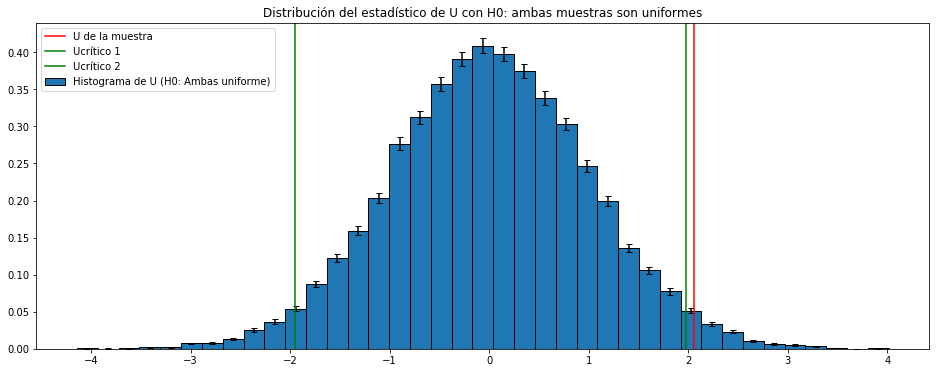

In [13]:
#Calcula el estadístico U para una seria de datos X y otra Y
def distribucion_U(x,y):
    x = np.array(x)
    y = np.array(y)
    sx = 0
    sy = 0
    m = len(x)
    n = len(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    for i in x:
        sx = sx + (i - mean_x)**2
    for j in y:
        sy = sy + (j - mean_y)**2
    u = (mean_x-mean_y)*np.sqrt((m+n-2)/((1/m+1/n)*(sx+sy)))
    return u

u_medido = distribucion_U(patNumeradasNunez,patNumeradasCaballito)

# Genera N veces X,Y con distribución uniforme y halla U para cada caso
def generador_U(m,n,N,pat_ultima):
    vector_u = []
    for i in range(N):
        x = np.random.uniform(low=1,high=pat_ultima,size=n)
        y = np.random.uniform(low=1,high=pat_ultima,size=m)
        u = distribucion_U(x,y)
        vector_u.append(u)
    return vector_u

vector_u = generador_U(len(patNumeradasNunez),len(patNumeradasCaballito),20000,pat_ultima)

#Histograma
cant_bin = 40
n_bins_u = np.linspace(np.min(vector_u),np.max(vector_u),cant_bin,endpoint=True)
ancho_bin_u = n_bins_u[1] - n_bins_u[0]
valores_u,bins_u = np.histogram(vector_u,bins=n_bins_u,density=True)

#Se define los Ucrítico 
alpha = 0.05 #Defino la signifacancia con el 5%
alpha1 = calcula_alpha(vector_u,alpha/2)
alpha2 = calcula_alpha(vector_u,1-alpha/2)

plt.figure(1,figsize=(16,6))
error = error_histograma(ancho_bin_u,vector_u,valores_u) #Error del bin
plt.bar(bins_u[:-1],valores_u,width=ancho_bin_u,yerr=error,capsize=3,ec='k',align='edge',label='Histograma de U (H0: Ambas uniforme)')
plt.axvline(x=u_medido,color='red',label='U de la muestra')
plt.axvline(x=alpha1,color='green',label='Ucrítico 1')
plt.axvline(x=alpha2,color='green',label='Ucrítico 2')
plt.legend()
plt.title('Distribución del estadístico de U con H0: ambas muestras son uniformes')

#Calcula el p valor con el método de dos colas
pvalor_u = 2*integrador(vector_u,u_medido)
print('El p-value es',pvalor_u,'osea un',pvalor_u*100,'%')
print('Tomando un alpha de',alpha)
if pvalor_u < alpha:
    print('Se rechaza la hípotesis cero (ambas provienen de una uniforme) ya que el p-value =',pvalor_u,'es menor que',alpha)
else:  
    print('Se acepta la hípotesis cero (ambas provienen de una uniforme) ya que el p-value =',pvalor_u,'es mayor que',alpha)

## Item 6: Combinando los test

El item 6 se propone realizar un test utilizando los pValores para las distribuciones de U y W del item 5. Cuando se tiene una distribución que cumple la hipótesis cero por definición la distribución para el Pvalor es una uniforme. Por este motivmo lo primero que se realizó es calcular el pValor para los 10000 valores de U generado utilizando la función del item 5 y lo mismo para W. Se construye un histograma para chequear que efectivamente tienen una distribución uniforme. Esto significa que **si efectivamente mis dos series de datos provienen de la misma distribución, que es lo que testean Wilcoxon y el test de U, realizó N veces de estas mediciones y para cada vez calculo el pValor va a tener una distribución uniforme.** Lógicamente no se realizaron N veces las mediciones de las patentes de Caballito y Nuñez. Pero lo que si se hizo fue calcular el pValor de W y el pValor de U para las mediciones que se tienen y de esta forma se calculó T de la distribución. Además se construye un histograma utilizando los pvalores de U y W como se observa en el tercer gráfico.

El p-value para el T medido es 1.44 %


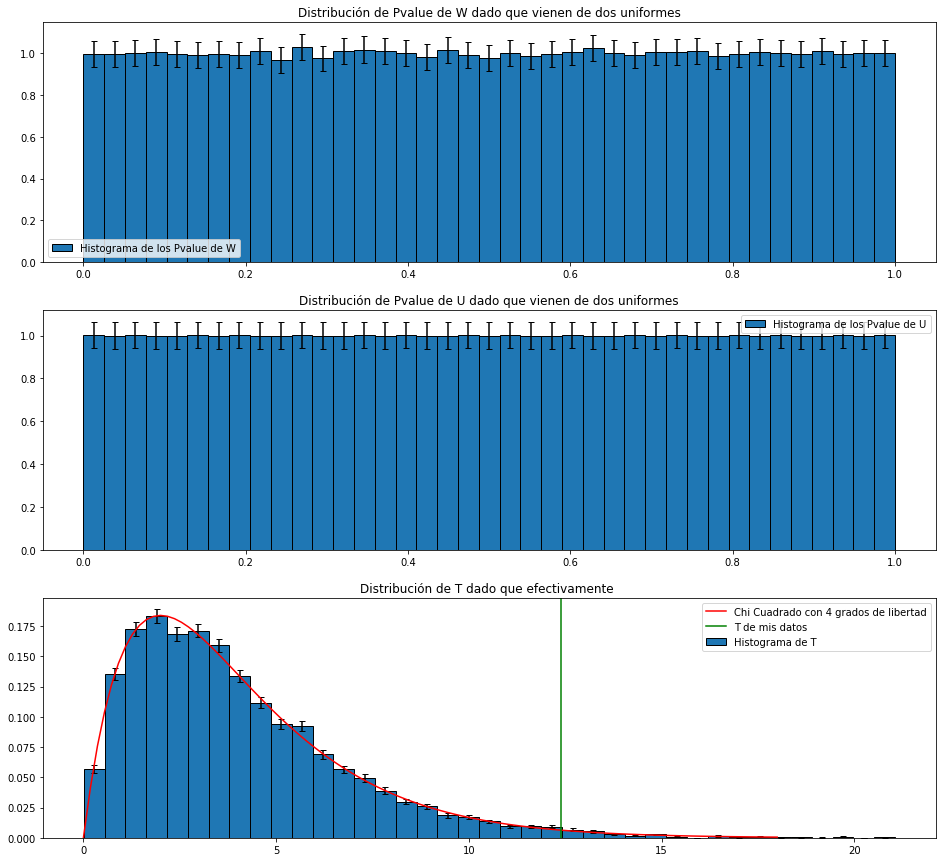

In [14]:
#Calcula el estadístico T dados dos pvalores
def estadistico_T(pvalor1,pvalor2):
    T = -2*np.log(pvalor1*pvalor2)
    return T

#T usando los pvalores anteriores
Tmedido=estadistico_T(pvalor_w,pvalor_u)

#Genera vectores para U y para W con N datos
vector_u = generador_U(len(patNumeradasNunez),len(patNumeradasCaballito),10000,pat_ultima)
vector_w, esperanza = simulador_wilcoxon(len(patNumeradasNunez),len(patNumeradasCaballito),pat_ultima,10000)

#Calcula los pvalores para U y para W y además para T
vector_T = []
vector_pu = []
vector_pw = []
for i in range(len(vector_u)):
    pvalue_u_gen = integrador(vector_u,vector_u[i])
    pvalue_w_gen = integrador(vector_w,vector_w[i])
    vector_pu.append(pvalue_u_gen)
    vector_pw.append(pvalue_w_gen)
    vector_T.append(estadistico_T(pvalue_u_gen,pvalue_w_gen))

#Histogramas
cant_bin = 40
n_bins_T = np.linspace(np.min(vector_T),np.max(vector_T),cant_bin,endpoint=True)
ancho_bin_T = n_bins_T[1] - n_bins_T[0]
valores_T,bins_T = np.histogram(vector_T,bins=n_bins_T,density=True)

n_bins_pu = np.linspace(np.min(vector_pu),np.max(vector_pu),cant_bin,endpoint=True)
ancho_bin_pu = n_bins_pu[1] - n_bins_pu[0]
valores_pu,bins_pu = np.histogram(vector_pu,bins=n_bins_pu,density=True)

n_bins_pw = np.linspace(np.min(vector_pw),np.max(vector_pw),cant_bin,endpoint=True)
ancho_bin_pw = n_bins_pw[1] - n_bins_pw[0]
valores_pw,bins_pw = np.histogram(vector_pw,bins=n_bins_pw,density=True)

#Plots
plt.figure(1,figsize=(16,15))
plt.subplot(3,1,1)
error1 = error_histograma(ancho_bin_pw,vector_pw,valores_pw) #Error del bin
plt.bar(bins_pw[:-1],valores_pw,yerr=error1,capsize=3,width=ancho_bin_pw, ec='k',align='edge',label='Histograma de los Pvalue de W')
plt.legend()
plt.title('Distribución de Pvalue de W dado que vienen de dos uniformes')

plt.subplot(3,1,2)
error2 = error_histograma(ancho_bin_pu,vector_pu,valores_pu) #Error del bin
plt.bar(bins_pu[:-1],valores_pu,yerr=error2,capsize=3,width=ancho_bin_pu, ec='k',align='edge',label='Histograma de los Pvalue de U')
plt.legend()
plt.title('Distribución de Pvalue de U dado que vienen de dos uniformes')

plt.subplot(3,1,3)
error3 = error_histograma(ancho_bin_T,vector_T,valores_T) #Error del bin
plt.bar(bins_T[:-1],valores_T,yerr=error3,capsize=3,width=ancho_bin_T, ec='k',align='edge',label='Histograma de T')
x_chisquare = np.linspace(0,18,100,endpoint=True)
plt.plot(x_chisquare,sci.chi2.pdf(x_chisquare,df=4),color='red',label='Chi Cuadrado con 4 grados de libertad')
plt.axvline(x=Tmedido,color='Green',label='T de mis datos')
plt.legend()
plt.title('Distribución de T dado que efectivamente ')

pvalor_T = integrador(vector_T,Tmedido)
print('El p-value para el T medido es',round(pvalor_T*100,2),'%')

La distribución del estadistico T es **Chi cuadrado con 4 grados de libertad** ya que el pValor de U y el pValor de W tienen cada uno 2 grados de libertad porque son generados por distribuciones uniformes donde cada una tiene 2 grados libertad (el valor mín y el valor máx).

En la celda de arriba se muestra cuanto da el pValor para este caso.

## Item 7: Sé tu propio verdugo

En el siguiente item se pide generar los histogramas del item 4 e indicar en este caso donde se encuentra la máxima medida para ambas muestras. En este caso se genera el histograma utlizando a **n como el valor de la máxima patente** y a **k como la cantidad de patentes observadas**. 

10000 simulaciones realizadas, suponiendo que se observaron 87 patentes.
El valor más alto obtenido en las generaciones es 2428503 y la patente más alta posible es 2428510
Lo más probable es que la patente más nueva observada este entre 2424241 y 2428503
De hecho la probablidad es de un 13.8 %
El p-value es para las patentes de Nuñez es: 11.5 %
10000 simulaciones realizadas, suponiendo que se observaron 107 patentes.
El valor más alto obtenido en las generaciones es 2428507 y la patente más alta posible es 2428510
Lo más probable es que la patente más nueva observada este entre 2425005 y 2428507
De hecho la probablidad es de un 15.02 %
El p-value es para las patentes de Caballito es: 1.46 %


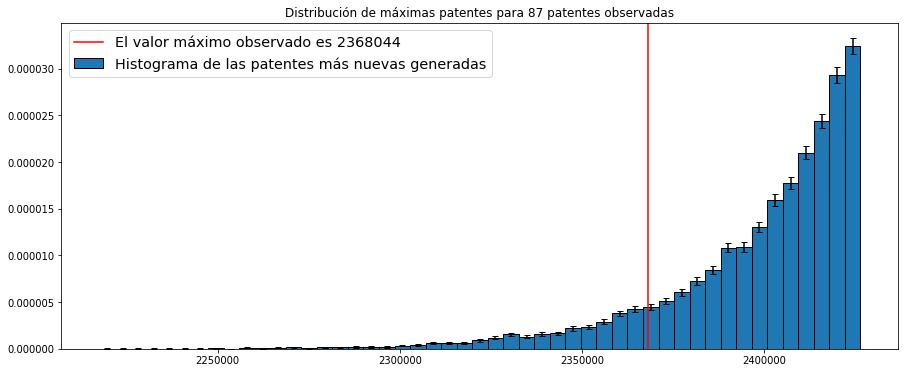

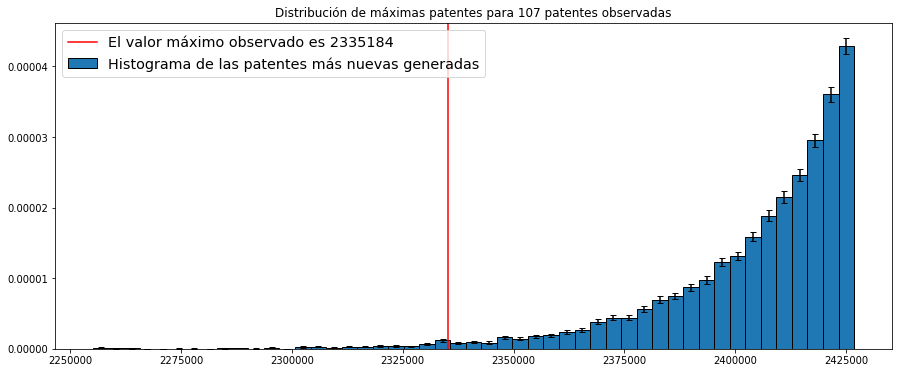

In [15]:
plt.figure(1,figsize=(15,6))
m_nun = item4(10000,pat_ultima,len(patNumeradasNunez),True,'Distribución de máximas patentes para '+str(len(patNumeradasNunez))+' patentes observadas')

etiqueta = 'El valor máximo observado es '+str(np.max(patNumeradasNunez))
plt.axvline(x=np.max(patNumeradasNunez),color='red',label=etiqueta)
plt.legend(fontsize='x-large')
m_nun = list(m_nun)
pvNunez = 1 - integrador(m_nun,np.max(patNumeradasNunez))
print('El p-value es para las patentes de Nuñez es:',round(pvNunez*100,2),'%')

plt.figure(2,figsize=(15,6))
m_cab = item4(10000,pat_ultima,len(patNumeradasCaballito),True,'Distribución de máximas patentes para '+str(len(patNumeradasCaballito))+' patentes observadas')

etiqueta = 'El valor máximo observado es '+str(np.max(patNumeradasCaballito))
plt.axvline(x=np.max(patNumeradasCaballito),color='red',label=etiqueta)
plt.legend(fontsize='x-large')
m_cab = list(m_cab)
pvCaballito = 1 - integrador(m_cab,np.max(patNumeradasCaballito))
print('El p-value es para las patentes de Caballito es:',round(pvCaballito*100,2),'%')

In [16]:
#Se define una significancia del 5%
alpha = 0.05

print('--> PARA LAS PATENTES DE CABALLITO:')
if alpha > pvCaballito:
    print('Para Caballito se rechaza en principio la hipótesis de que las patentes provengan de una uniforme')
    print('La probablidad de que el medir',np.max(patNumeradasCaballito),'o una menor como máxima es menor que',round(pvCaballito*100,2),'%')
else:
    print('Para Caballito se acepta en principio la hipótesis de que las patentes provengan de una uniforme')

print('--> PARA LAS PATENTES DE NUÑEZ:')
if alpha > pvNunez:
    print('Para Nuñez se rechaza en principio la hipótesis de que las patentes provengan de una uniforme')
    print('La probablidad de que el medir',np.max(patNumeradasNunez),'o una menor como máxima es menor que',round(pvNunez*100,2),'%')
else:
    print('Para Nuñez se acepta en principio la hipótesis de que las patentes provengan de una uniforme')

--> PARA LAS PATENTES DE CABALLITO:
Para Caballito se rechaza en principio la hipótesis de que las patentes provengan de una uniforme
La probablidad de que el medir 2335184 o una menor como máxima es menor que 1.46 %
--> PARA LAS PATENTES DE NUÑEZ:
Para Nuñez se acepta en principio la hipótesis de que las patentes provengan de una uniforme


## Conclusiones generales

Las conclusiones generales se presentan al final ya que el programa calcula por si sólo los pValores, dice si los mismos son mayores o menores a la significancia en cada caso. En ese sentido bastará con cargar otro archivo de patentes medidas en vez de las mediciones realizadas en Caballito o Nuñez y todo lo descripto arriba será igual de válido ya que es autocontenido. (A excepción de una breve reflexión en el item 3 sobre la potencia). Por ese motivo a continuación se describen algunas conclusiones que **solamente** son válidas para las mediciones de Nuñez y de Caballito

La primer conclusión general que se observa a lo largo de los test que se van desarrollando es que las patentes de Caballito **no provienen de una distribución uniforme** mientras que las de Nuñez **si provienen de una distribución uniforme**. Veamos en partícular que ocurre en cada item.

**Item 3:** Se concluye que las patentes de Caballito **NO** cumplen una distribución uniforme si no que cumplen la exponencial que es la hipótesis uno ya que el pValor está debajo de la significancia del 5%. Para las patentes de Nuñez pasa lo contrario. Además otra conclusión interesante a observar, es que la potencia del Test es menor a 40% en ambos casos pero la del test aplicado para Caballito es **más grande** que la de Nuñez. Se debe a que la potencia mejora a medida que aumenta la cantidad de mediciones. El motivo está detallado con detalle en el mismo item 3 junto a los gráficos.

**Item 4:** Se realiza una estimación con inferencia Bayesiana utilizando un upper limit. En ese sentido se calculan intervalos con cofidence level de 68% y 95%. En el caso de Caballito el valor máximo real no esta contenido en ninguno de los dos intervalos mientras que para Nuñez está contenido en el intervalo de 95%. Reforzando la idea del item 3 de que las patentes en Nuñez si provienen de una uniforme y en Caballito no.

**Item 5:** La aplicación del Test de Wilcoxon y de la distribución vuelven a reforzar la idea de que efectivamente ambas mediciones **no pertenecen a la misma distribución**, en este caso que ambas **no provienen de una uniforme entre la primer y la última patente registrada**.

**Item 6:** La aplicación de dicho Test que supone que los pValores deberían provenir de una uniforme también devuelve un pValor para las mediciones menor que la significancia del 5% por lo que se rechaza la idea de que los pValores provengan de una uniforme y entonces se refuerza lo calculado en el item 5.

**Item 7:** Finalmente al ser mi propio verdugo puedo concluir que las patentes de Nuñez tienen un pValor por ensima del 5% de significancia mientras que las de Caballito no. ¿Habrá habido algún sesgo a la hora de medir las patentes de Caballito? ¿O simplemente tienen una distribución exponencial como la propuesta item 3 que tira por la borda sistemáticamente los distintos test aplicados durante el trabajo que suponen que provienen de una uniforme?. 